In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Libraries to define the required functions
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

from pmdarima.model_selection import train_test_split as time_train_test_split
from sklearn import metrics
from sklearn.model_selection import ParameterGrid

from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

In [274]:
df=pd.read_excel('Table_1.2_Primary_Energy_Production_by_Source.xlsx',sheet_name='Monthly Data')
# weather_data=pd.read
weather_data=pd.read_csv('USA Weather Data.csv')


df

,Date,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric Power Production,Geothermal Energy Production,Solar Energy Production,Wind Energy Production,Biomass Energy Production,Total Renewable Energy Production,Total Primary Energy Production
0,NaT,(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu)
1,1973-01-01,1.166486,1.908249,1.649833,0.208064,4.932632,0.068103,0.272703,0.001491,Not Available,Not Available,0.129787,0.403981,5.404715
2,1973-02-01,1.086072,1.922543,1.525783,0.195184,4.729582,0.064634,0.242199,0.001363,Not Available,Not Available,0.117338,0.3609,5.155115
3,1973-03-01,1.196571,1.86843,1.667094,0.214807,4.946902,0.072494,0.26881,0.001412,Not Available,Not Available,0.129938,0.400161,5.419556
4,1973-04-01,1.11223,1.777561,1.616791,0.20969,4.716271,0.06407,0.253185,0.001649,Not Available,Not Available,0.125636,0.38047,5.160812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2021-08-01,1.001096,3.030351,1.977016,0.618649,6.627111,0.725698,0.183832,0.017345,0.15357,0.234966,0.418346,1.008059,8.360867
585,2021-09-01,0.994565,2.912485,1.852637,0.595679,6.355365,0.673595,0.157619,0.017141,0.14182,0.251575,0.401881,0.970036,7.998996
586,2021-10-01,0.981484,3.072584,2.033476,0.634791,6.722335,0.594842,0.157905,0.01689,0.12001,0.284597,0.431384,1.010785,8.327963
587,2021-11-01,0.978921,3.017053,2.009954,0.620122,6.62605,0.655479,0.179494,0.017036,0.102039,0.316202,0.428745,1.043517,8.325047


In [275]:
df.rename(columns={'Solar Energy Production':'Solar_Energy_Production','Hydroelectric Power Production':'Hydroelectric_Power_Production','Geothermal Energy Production':'Geothermal_Energy_Production','Biomass Energy Production':'Biomass_Energy_Production','Wind Energy Production':'Wind_Energy_Production','Date':'Date time'},inplace=True)
df=df._convert(numeric=True)
df['Solar_Energy_Production']=df['Solar_Energy_Production'].fillna(0)
df['Wind_Energy_Production']=df['Wind_Energy_Production'].fillna(0)
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)







In [295]:
df["Date time"]=pd.to_datetime(df['Date time'])
df['Date time']=df['Date time'].dt.strftime('%Y-%d-%m')
df["Date time"]=pd.to_datetime(df['Date time'])
df

,Date time,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric_Power_Production,Geothermal_Energy_Production,Solar_Energy_Production,Wind_Energy_Production,Biomass_Energy_Production,Total Renewable Energy Production,Total Primary Energy Production
1,1973-01-01,1.166486,1.908249,1.649833,0.208064,4.932632,0.068103,0.272703,0.001491,0.000000,0.000000,0.129787,0.403981,5.404715
2,1973-02-01,1.086072,1.922543,1.525783,0.195184,4.729582,0.064634,0.242199,0.001363,0.000000,0.000000,0.117338,0.360900,5.155115
3,1973-03-01,1.196571,1.868430,1.667094,0.214807,4.946902,0.072494,0.268810,0.001412,0.000000,0.000000,0.129938,0.400161,5.419556
4,1973-04-01,1.112230,1.777561,1.616791,0.209690,4.716271,0.064070,0.253185,0.001649,0.000000,0.000000,0.125636,0.380470,5.160812
5,1973-05-01,1.216978,1.859241,1.665377,0.215398,4.956995,0.062111,0.260770,0.001537,0.000000,0.000000,0.129834,0.392141,5.411246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2021-08-01,1.001096,3.030351,1.977016,0.618649,6.627111,0.725698,0.183832,0.017345,0.153570,0.234966,0.418346,1.008059,8.360867
585,2021-09-01,0.994565,2.912485,1.852637,0.595679,6.355365,0.673595,0.157619,0.017141,0.141820,0.251575,0.401881,0.970036,7.998996
586,2021-10-01,0.981484,3.072584,2.033476,0.634791,6.722335,0.594842,0.157905,0.016890,0.120010,0.284597,0.431384,1.010785,8.327963
587,2021-11-01,0.978921,3.017053,2.009954,0.620122,6.626050,0.655479,0.179494,0.017036,0.102039,0.316202,0.428745,1.043517,8.325047


In [293]:
weather_data["Date time"]=pd.to_datetime(weather_data['Date time'])

weather_data['Date time']=weather_data['Date time'].dt.strftime('%Y-%d-%m')
weather_data["Date time"]=pd.to_datetime(weather_data['Date time'])
weather_data.head(40)

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
0,1973-01-01,64.3,14.7,37.5,5.3,NaN,2.27,28.3,NaN,NaN,11.2,60.7,57.91
1,1973-02-01,65.8,9.2,37.2,-9.1,NaN,8.27,25.8,NaN,NaN,11.1,64.9,57.75
2,1973-03-01,72.6,33.8,51.2,25.4,NaN,5.26,33.4,NaN,NaN,9.0,78.9,69.40
3,1973-04-01,86.0,32.8,56.1,26.8,85.1,4.85,25.4,NaN,NaN,11.3,67.0,61.53
4,1973-05-01,83.7,39.5,62.8,34.7,86.3,4.66,22.6,NaN,NaN,10.2,67.1,65.41
5,1973-06-01,92.1,58.8,76.3,NaN,99.6,2.36,23.1,NaN,NaN,8.1,60.8,71.24
6,1973-07-01,94.9,61.4,78.7,NaN,106.1,2.97,18.7,NaN,NaN,8.2,55.8,66.06
7,1973-08-01,97.5,59.6,78.6,NaN,105.9,4.60,17.6,NaN,NaN,7.1,53.2,68.68
8,1973-09-01,94.9,51.7,72.9,NaN,105.4,2.34,18.6,NaN,NaN,9.0,59.1,65.01
9,1973-10-01,85.6,38.5,62.2,37.0,86.2,1.95,21.9,NaN,NaN,10.0,42.9,62.73


In [296]:
final_prod=df.merge(weather_data, on='Date time')
final_prod=final_prod.drop(['Heat Index'],axis=1)
final_prod=final_prod.fillna(0)
actual_US=final_prod.copy()
final_prod

,Date time,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric_Power_Production,Geothermal_Energy_Production,Solar_Energy_Production,...,Minimum Temperature,Temperature,Wind Chill,Precipitation,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
0,1973-01-01,1.166486,1.908249,1.649833,0.208064,4.932632,0.068103,0.272703,0.001491,0.000000,...,14.7,37.5,5.3,2.27,28.3,0.00,0.0,11.2,60.7,57.91
1,1973-02-01,1.086072,1.922543,1.525783,0.195184,4.729582,0.064634,0.242199,0.001363,0.000000,...,9.2,37.2,-9.1,8.27,25.8,0.00,0.0,11.1,64.9,57.75
2,1973-03-01,1.196571,1.868430,1.667094,0.214807,4.946902,0.072494,0.268810,0.001412,0.000000,...,33.8,51.2,25.4,5.26,33.4,0.00,0.0,9.0,78.9,69.40
3,1973-04-01,1.112230,1.777561,1.616791,0.209690,4.716271,0.064070,0.253185,0.001649,0.000000,...,32.8,56.1,26.8,4.85,25.4,0.00,0.0,11.3,67.0,61.53
4,1973-05-01,1.216978,1.859241,1.665377,0.215398,4.956995,0.062111,0.260770,0.001537,0.000000,...,39.5,62.8,34.7,4.66,22.6,0.00,0.0,10.2,67.1,65.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2021-08-01,1.001096,3.030351,1.977016,0.618649,6.627111,0.725698,0.183832,0.017345,0.153570,...,66.0,79.0,0.0,5.93,23.3,179.33,50.6,9.8,69.7,66.61
584,2021-09-01,0.994565,2.912485,1.852637,0.595679,6.355365,0.673595,0.157619,0.017141,0.141820,...,58.4,76.9,0.0,4.41,24.4,175.55,42.5,9.6,60.8,70.38
585,2021-10-01,0.981484,3.072584,2.033476,0.634791,6.722335,0.594842,0.157905,0.016890,0.120010,...,47.2,68.2,43.9,1.66,20.8,169.80,41.4,9.6,62.5,69.48
586,2021-11-01,0.978921,3.017053,2.009954,0.620122,6.626050,0.655479,0.179494,0.017036,0.102039,...,33.6,54.9,27.3,3.40,25.8,209.34,45.9,9.7,59.3,63.96


In [297]:
final_prod.shape

(588, 25)

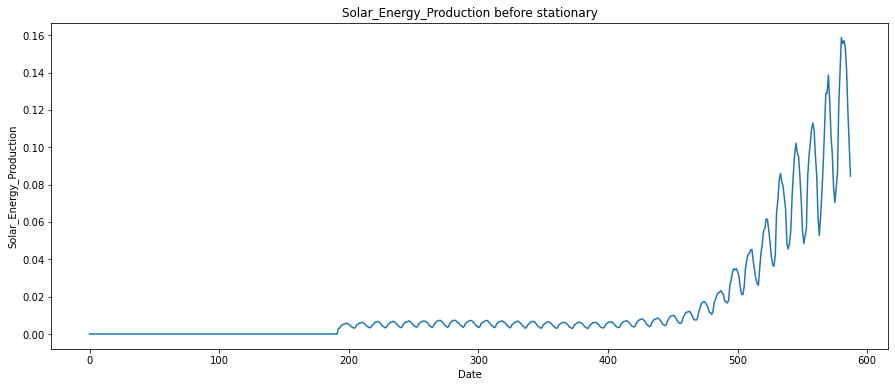

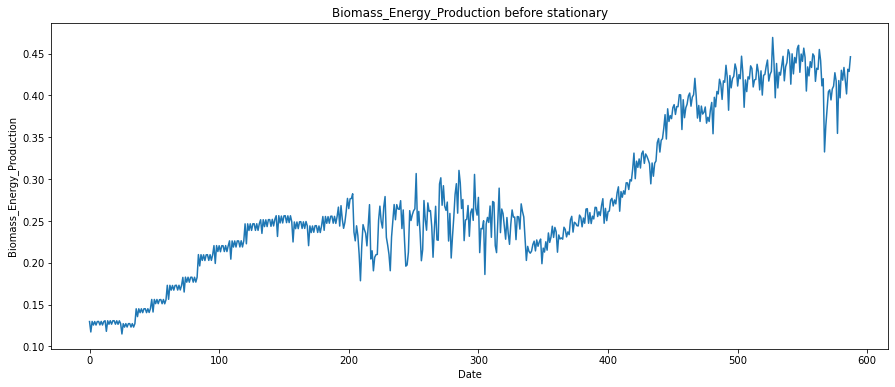

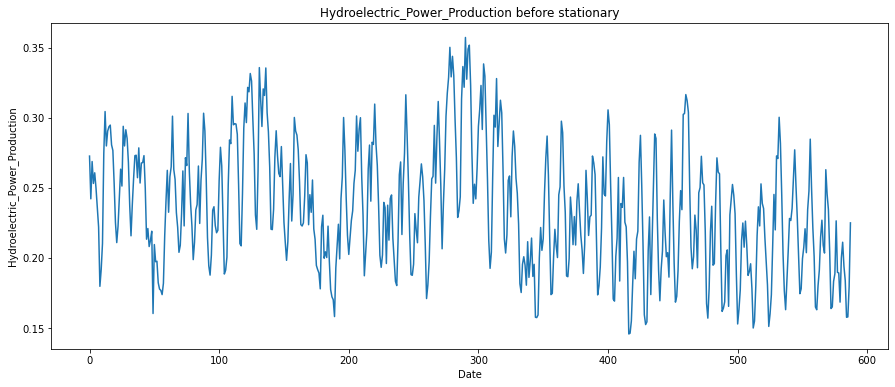

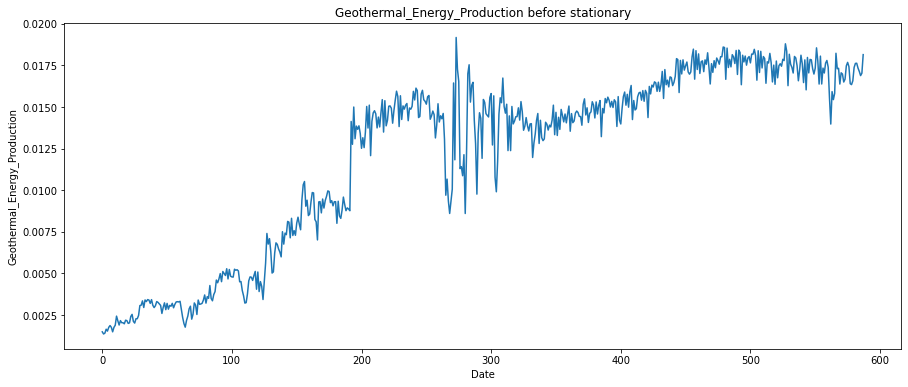

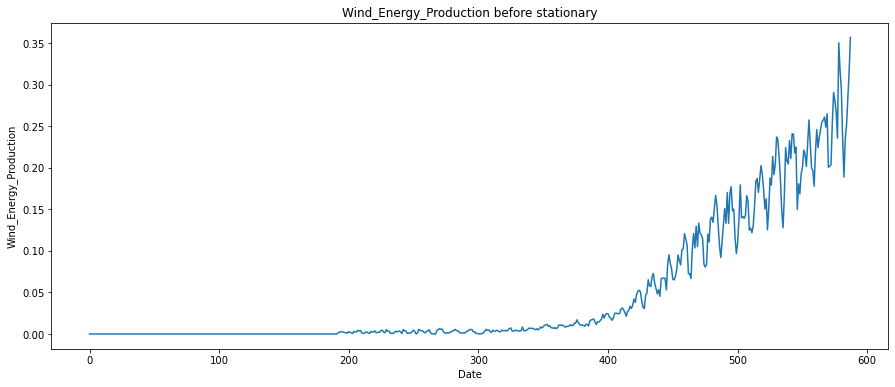

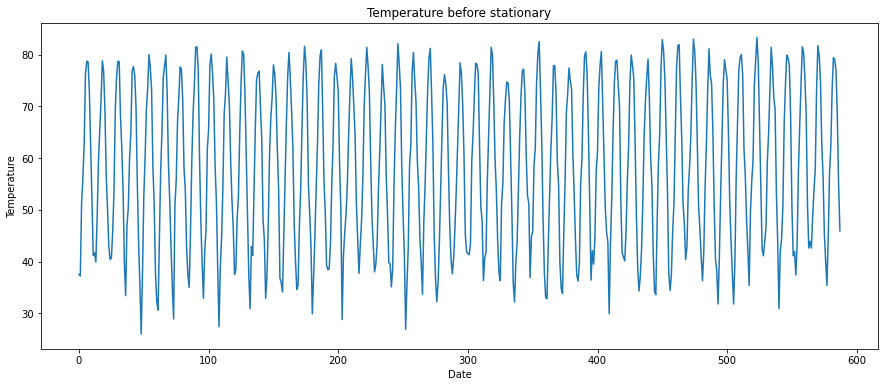

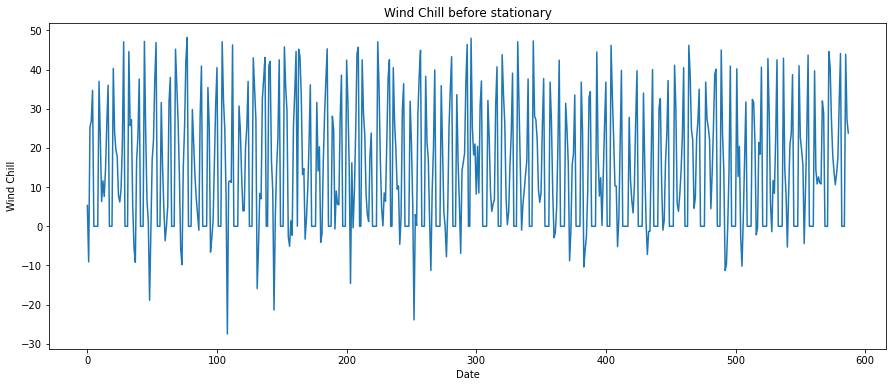

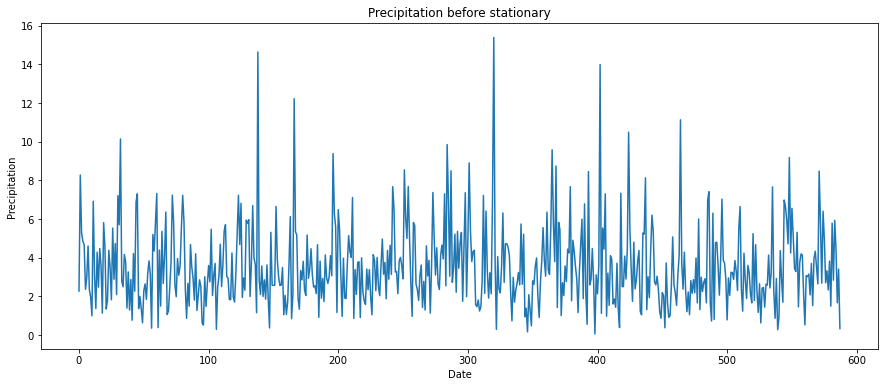

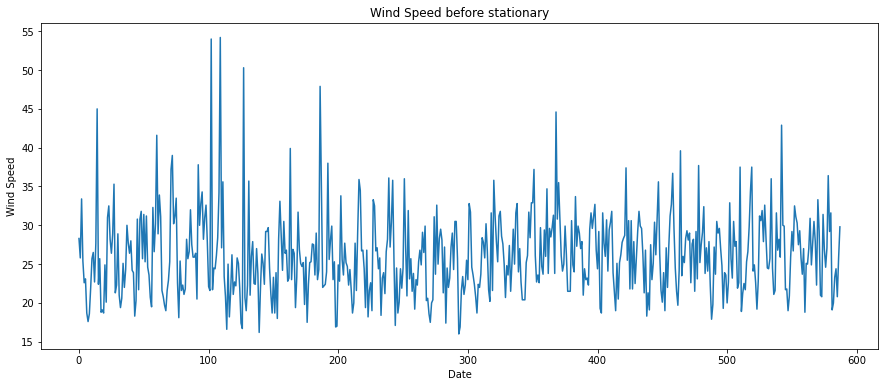

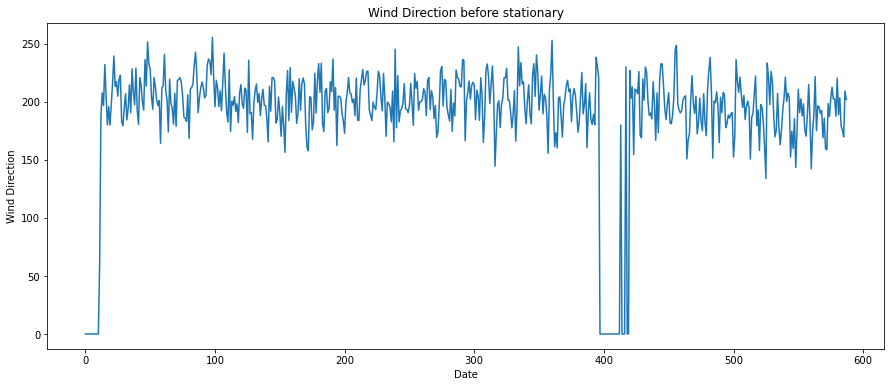

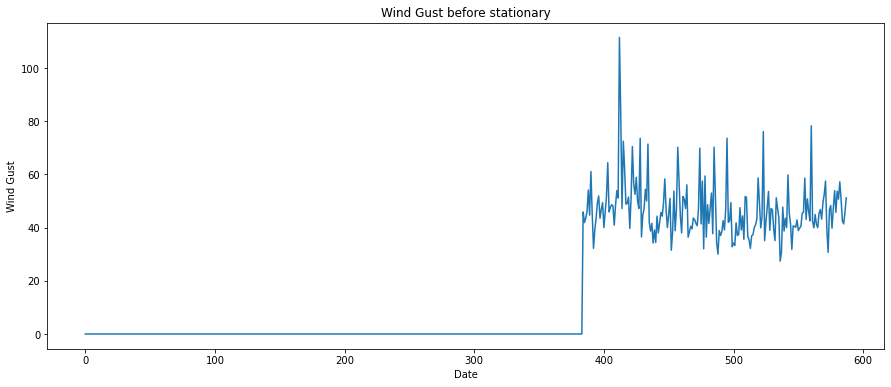

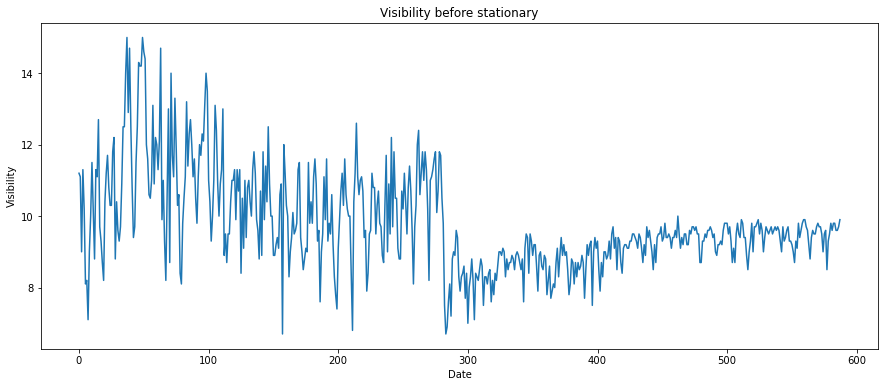

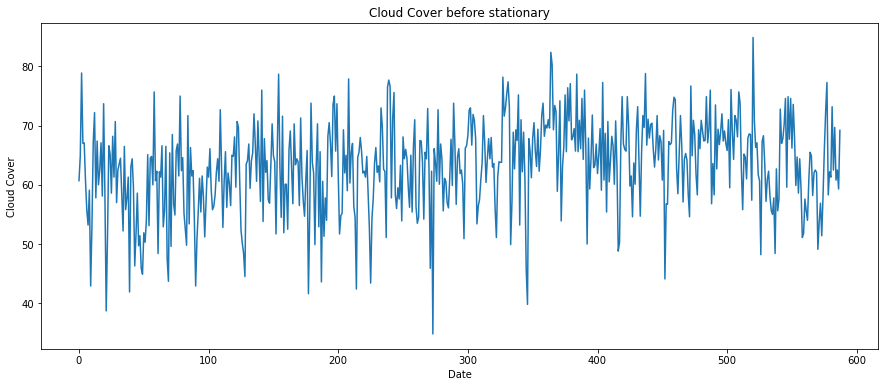

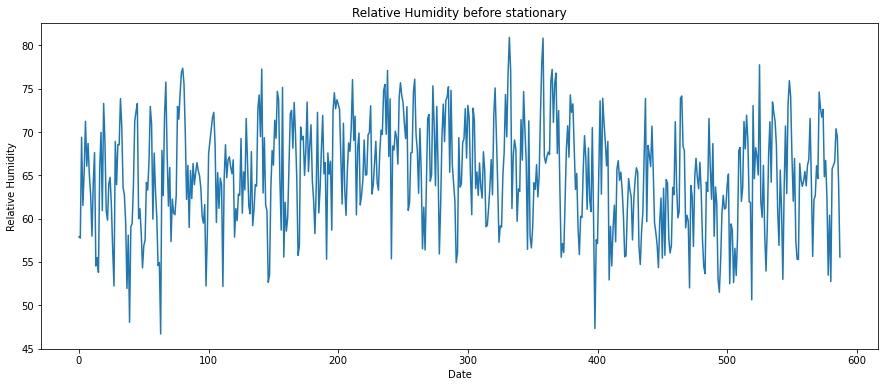

In [298]:
for feature in final_prod[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Wind Gust','Visibility','Cloud Cover','Relative Humidity']]:
    final_prod[str(feature)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(feature)
    plt.title(f"{str(feature)} before stationary")
    plt.show()

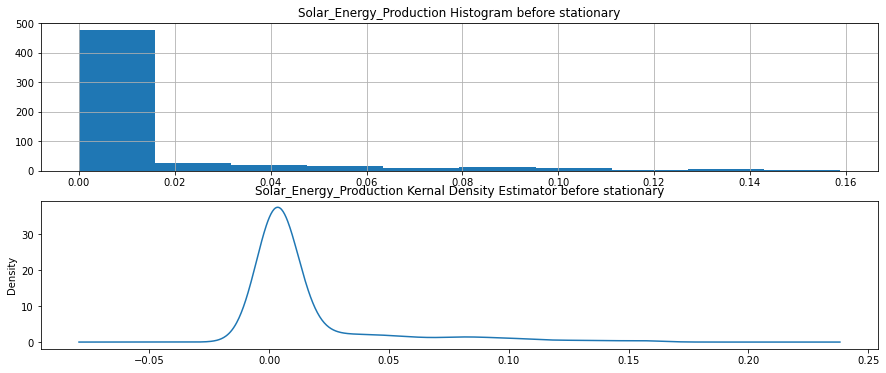

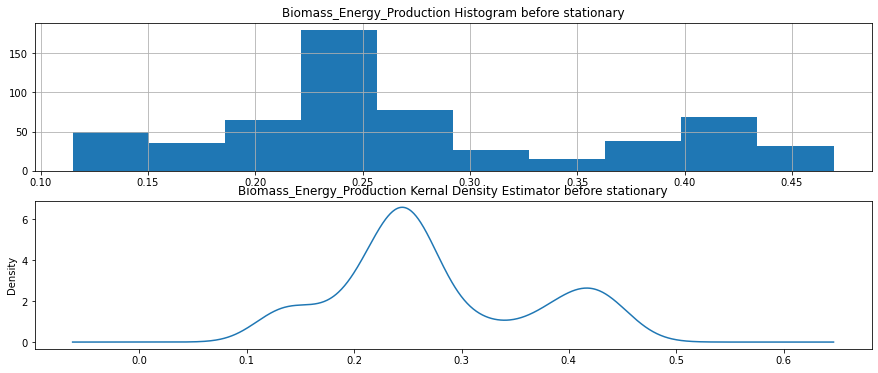

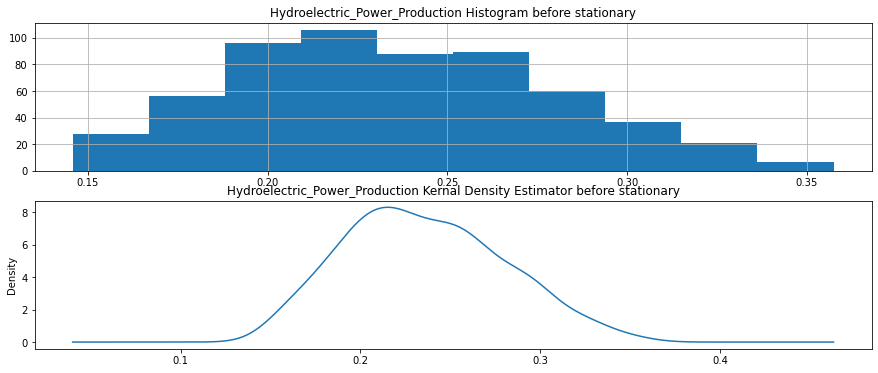

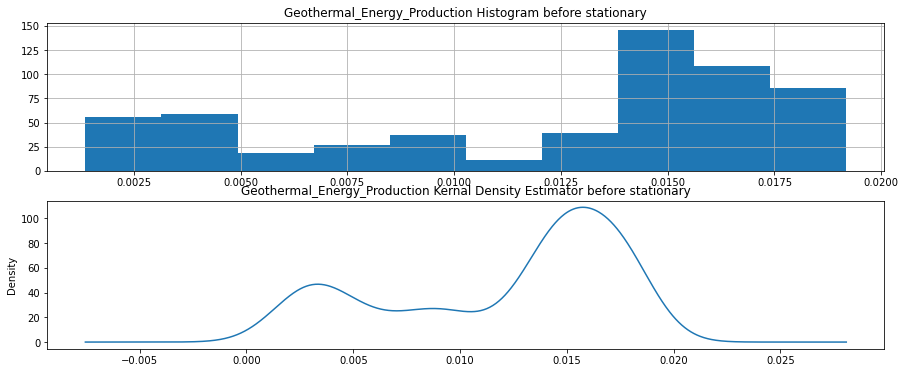

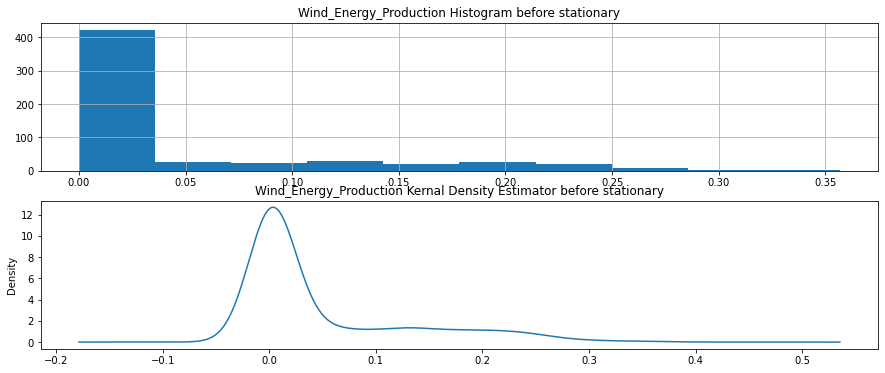

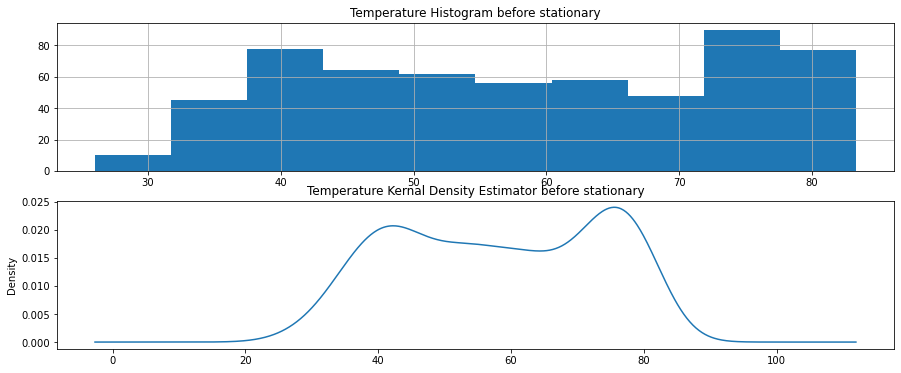

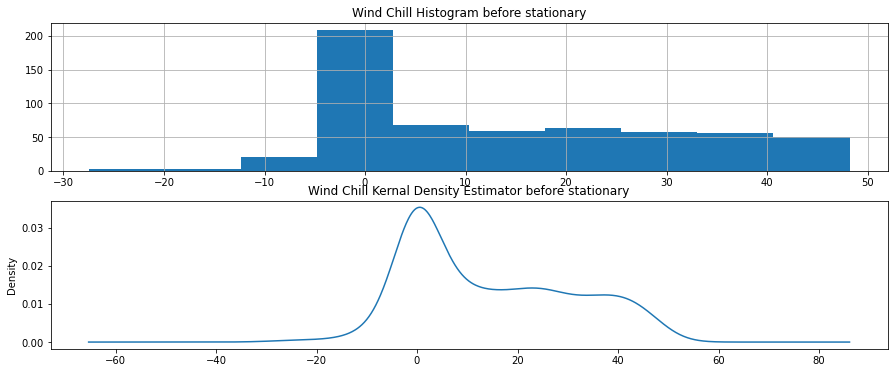

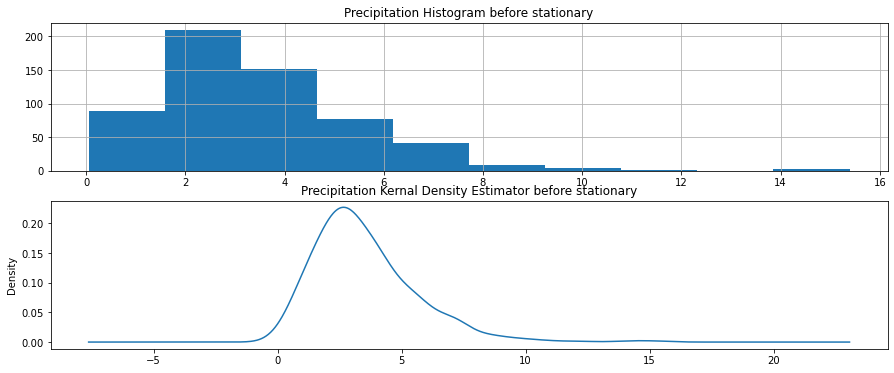

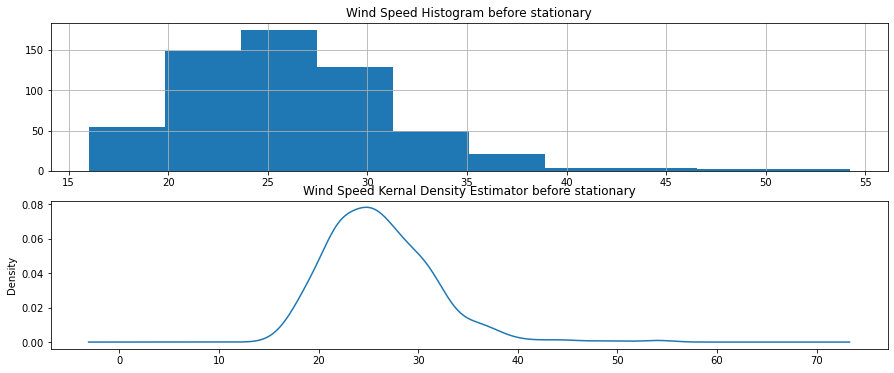

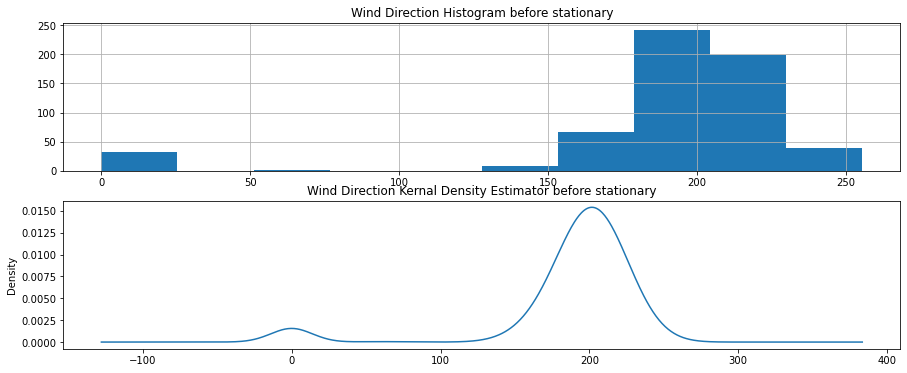

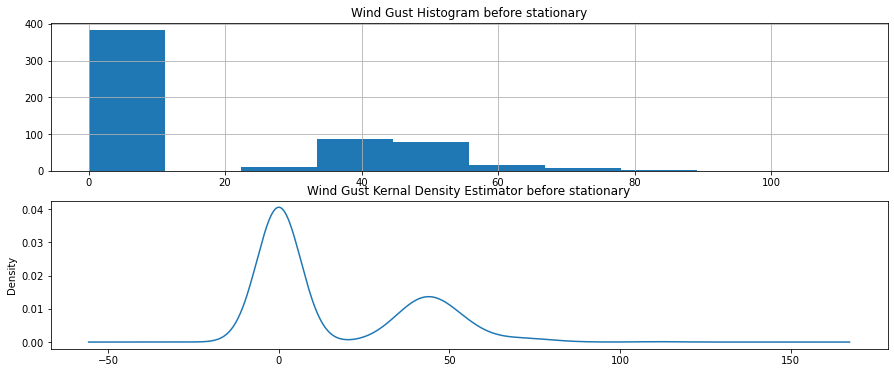

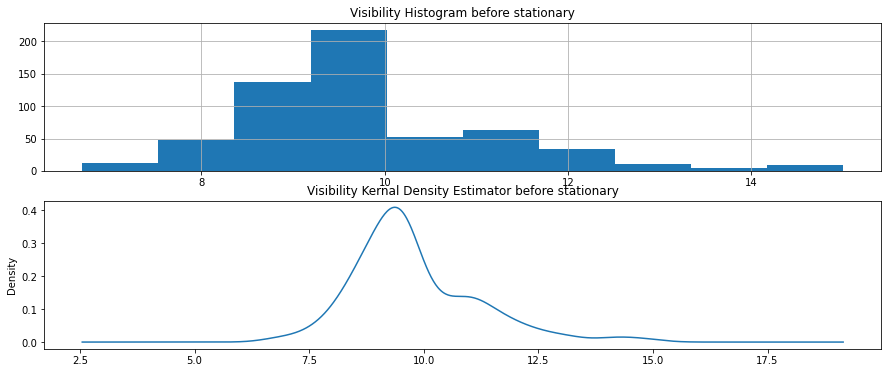

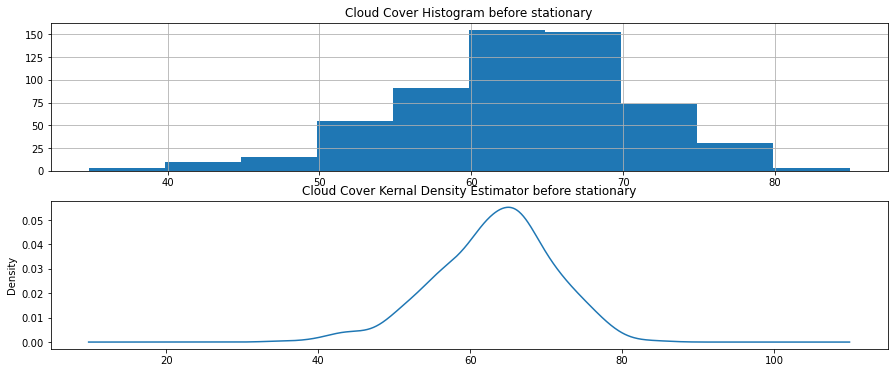

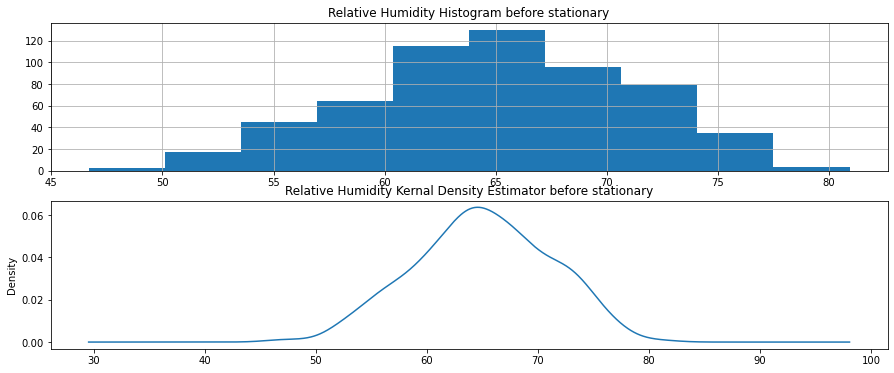

In [299]:
for feature in final_prod[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Wind Gust','Visibility','Cloud Cover','Relative Humidity']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(feature)} Histogram before stationary")
    final_prod[str(feature)].hist()
    plt.subplot(212)
    final_prod[str(feature)].plot(kind='kde')
    plt.title(f"{str(feature)} Kernal Density Estimator before stationary")
    plt.show()

In [300]:
def mean_absolute_percentage_error(y_true, y_pred):   
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [301]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [302]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [303]:
def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [304]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [312]:
x=final_prod[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Wind Gust','Visibility','Cloud Cover','Relative Humidity']]

trainX,testX=time_train_test_split(x,test_size=0.3)

trainX=trainX.drop('Wind Gust',axis=1)

In [314]:
trainX

,Solar_Energy_Production,Biomass_Energy_Production,Hydroelectric_Power_Production,Geothermal_Energy_Production,Wind_Energy_Production,Temperature,Wind Chill,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
0,0.000000,0.129787,0.272703,0.001491,0.000000,37.5,5.3,2.27,28.3,0.0,11.2,60.7,57.91
1,0.000000,0.117338,0.242199,0.001363,0.000000,37.2,-9.1,8.27,25.8,0.0,11.1,64.9,57.75
2,0.000000,0.129938,0.268810,0.001412,0.000000,51.2,25.4,5.26,33.4,0.0,9.0,78.9,69.40
3,0.000000,0.125636,0.253185,0.001649,0.000000,56.1,26.8,4.85,25.4,0.0,11.3,67.0,61.53
4,0.000000,0.129834,0.260770,0.001537,0.000000,62.8,34.7,4.66,22.6,0.0,10.2,67.1,65.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.004073,0.270475,0.201075,0.014993,0.025199,50.3,22.4,7.30,26.0,0.0,9.0,68.7,68.88
407,0.003746,0.283636,0.214210,0.015913,0.024517,45.7,10.3,0.97,30.7,0.0,8.8,55.4,66.10
408,0.003375,0.290845,0.257426,0.016297,0.024239,43.7,10.3,3.20,24.1,0.0,8.9,70.7,68.92
409,0.003691,0.261666,0.183513,0.014248,0.024906,29.9,-5.2,1.53,29.4,0.0,9.3,60.5,52.92


In [315]:
for name, column in final_prod[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover','Relative Humidity']].iteritems():
    Augmented_Dickey_Fuller_Test_func(final_prod[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Solar_Energy_Production
Test Statistic                   3.409177
p-value                          1.000000
No Lags Used                    19.000000
Number of Observations Used    568.000000
Critical Value (1%)             -3.441915
Critical Value (5%)             -2.866642
Critical Value (10%)            -2.569487
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Biomass_Energy_Production
Test Statistic                  -0.702233
p-value                          0.846170
No Lags Used                    17.000000
Number of Observations Used    570.000000
Critical Value (1%)             -3.441875
Critical Value (5%)             -2.866624
Critical Value (10%)            -2.569478
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Hydroelectric_Power_Production
Test Statistic       

In [108]:
#  X = final_prod[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Wind Gust','Visibility','Cloud Cover','Relative Humidity']]

# trainX,testX = time_train_test_split(X,test_size=0.3)


In [316]:
train_diff = trainX.diff()
train_diff.dropna(inplace = True)
# trainX["Visibility"].diff()
# trainX["Visibility"]=trainX["Visibility"].fillna(0)
# trainX["Visibility"].dropna()

In [317]:
train_diff

,Solar_Energy_Production,Biomass_Energy_Production,Hydroelectric_Power_Production,Geothermal_Energy_Production,Wind_Energy_Production,Temperature,Wind Chill,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
1,0.000000,-0.012449,-0.030504,-0.000128,0.000000,-0.3,-14.4,6.00,-2.5,0.0,-0.1,4.2,-0.16
2,0.000000,0.012600,0.026611,0.000049,0.000000,14.0,34.5,-3.01,7.6,0.0,-2.1,14.0,11.65
3,0.000000,-0.004302,-0.015625,0.000237,0.000000,4.9,1.4,-0.41,-8.0,0.0,2.3,-11.9,-7.87
4,0.000000,0.004198,0.007585,-0.000112,0.000000,6.7,7.9,-0.19,-2.8,0.0,-1.1,0.1,3.88
5,0.000000,-0.004223,-0.010911,0.000226,0.000000,13.5,-34.7,-2.30,0.5,0.0,-2.1,-6.3,5.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.001023,-0.004645,0.031905,-0.000773,0.000976,-10.3,-10.8,2.86,-1.7,0.0,0.0,7.9,-2.24
407,-0.000327,0.013161,0.013135,0.000920,-0.000682,-4.6,-12.1,-6.33,4.7,0.0,-0.2,-13.3,-2.78
408,-0.000371,0.007209,0.043216,0.000384,-0.000278,-2.0,0.0,2.23,-6.6,0.0,0.1,15.3,2.82
409,0.000316,-0.029179,-0.073913,-0.002049,0.000667,-13.8,-15.5,-1.67,5.3,0.0,0.4,-10.2,-16.00


In [318]:
for name, column in train_diff[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover','Relative Humidity']].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Solar_Energy_Production
Test Statistic                  -5.333361
p-value                          0.000005
No Lags Used                    15.000000
Number of Observations Used    394.000000
Critical Value (1%)             -3.447057
Critical Value (5%)             -2.868904
Critical Value (10%)            -2.570693
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Biomass_Energy_Production
Test Statistic                  -5.356734
p-value                          0.000004
No Lags Used                    16.000000
Number of Observations Used    393.000000
Critical Value (1%)             -3.447099
Critical Value (5%)             -2.868923
Critical Value (10%)            -2.570703
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Hydroelectric_Power_Production
Test Statistic                  -5.382445
p-v

In [319]:
train_diff

,Solar_Energy_Production,Biomass_Energy_Production,Hydroelectric_Power_Production,Geothermal_Energy_Production,Wind_Energy_Production,Temperature,Wind Chill,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
1,0.000000,-0.012449,-0.030504,-0.000128,0.000000,-0.3,-14.4,6.00,-2.5,0.0,-0.1,4.2,-0.16
2,0.000000,0.012600,0.026611,0.000049,0.000000,14.0,34.5,-3.01,7.6,0.0,-2.1,14.0,11.65
3,0.000000,-0.004302,-0.015625,0.000237,0.000000,4.9,1.4,-0.41,-8.0,0.0,2.3,-11.9,-7.87
4,0.000000,0.004198,0.007585,-0.000112,0.000000,6.7,7.9,-0.19,-2.8,0.0,-1.1,0.1,3.88
5,0.000000,-0.004223,-0.010911,0.000226,0.000000,13.5,-34.7,-2.30,0.5,0.0,-2.1,-6.3,5.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.001023,-0.004645,0.031905,-0.000773,0.000976,-10.3,-10.8,2.86,-1.7,0.0,0.0,7.9,-2.24
407,-0.000327,0.013161,0.013135,0.000920,-0.000682,-4.6,-12.1,-6.33,4.7,0.0,-0.2,-13.3,-2.78
408,-0.000371,0.007209,0.043216,0.000384,-0.000278,-2.0,0.0,2.23,-6.6,0.0,0.1,15.3,2.82
409,0.000316,-0.029179,-0.073913,-0.002049,0.000667,-13.8,-15.5,-1.67,5.3,0.0,0.4,-10.2,-16.00


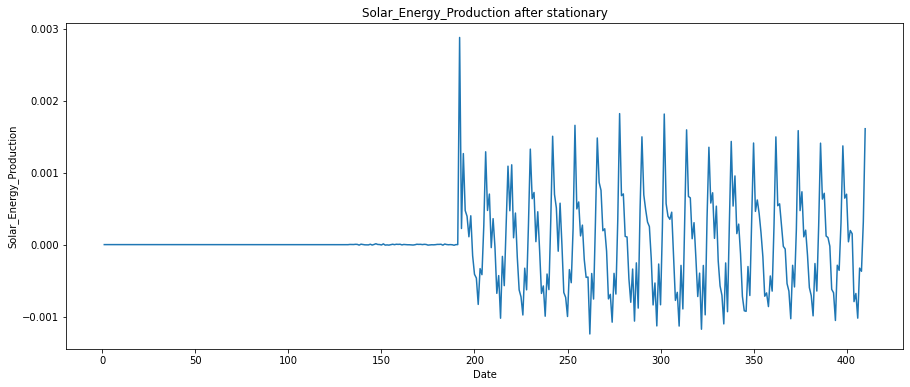

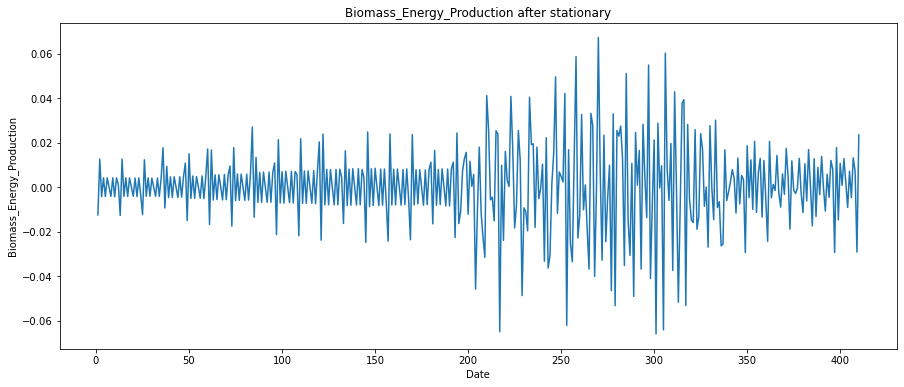

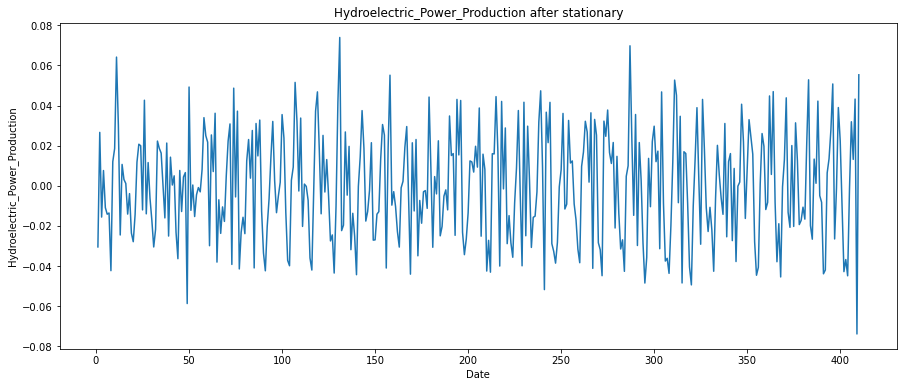

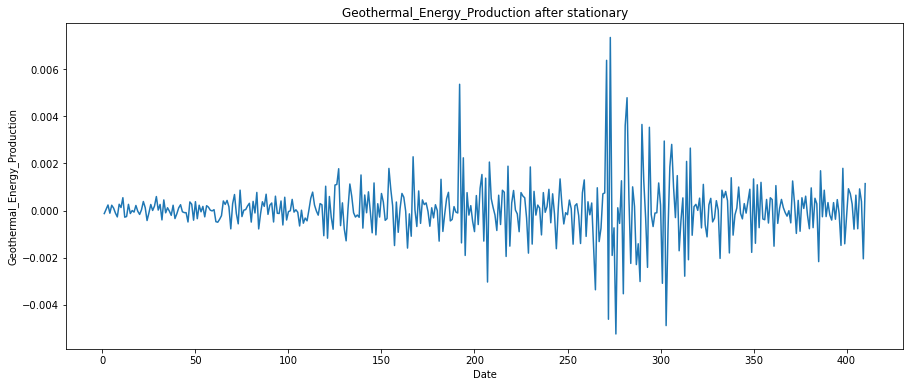

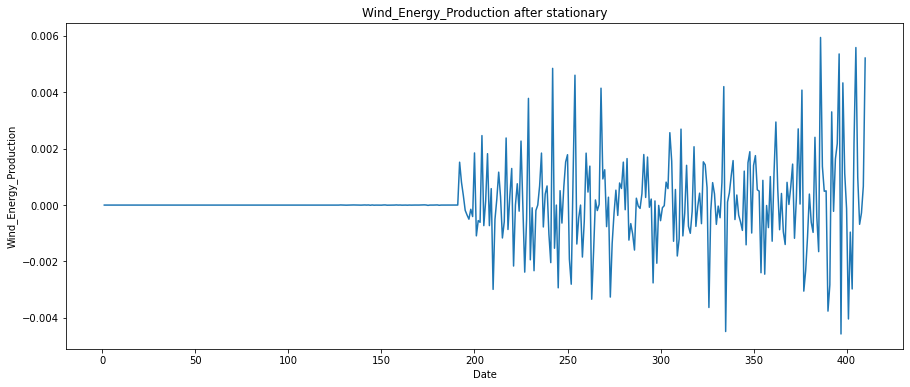

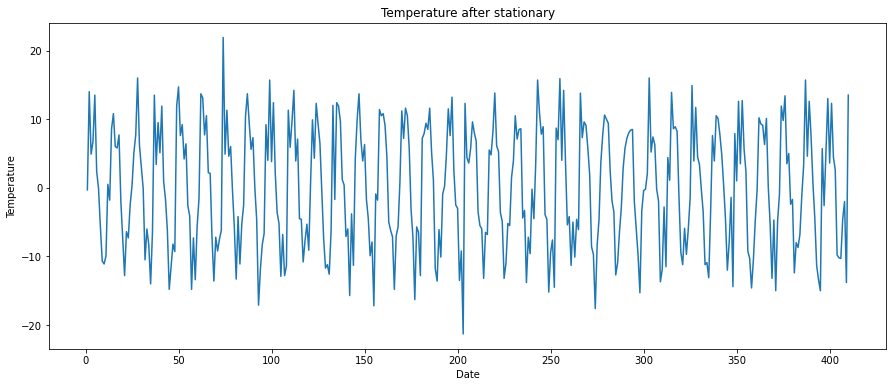

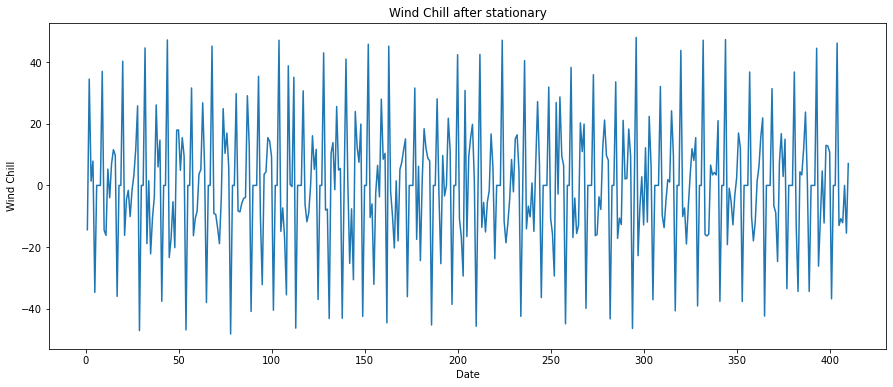

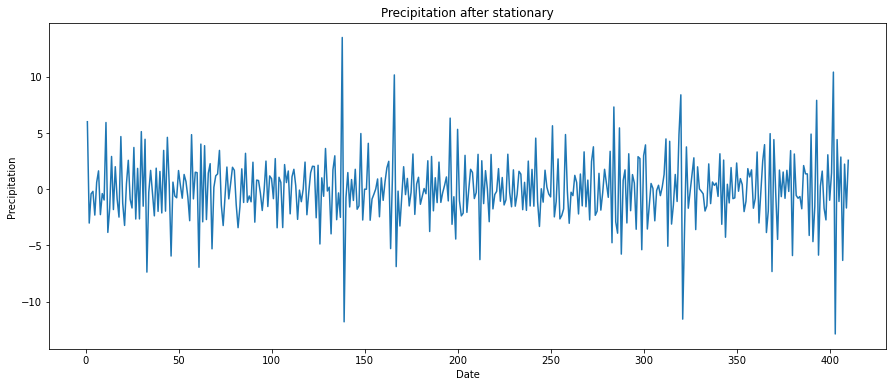

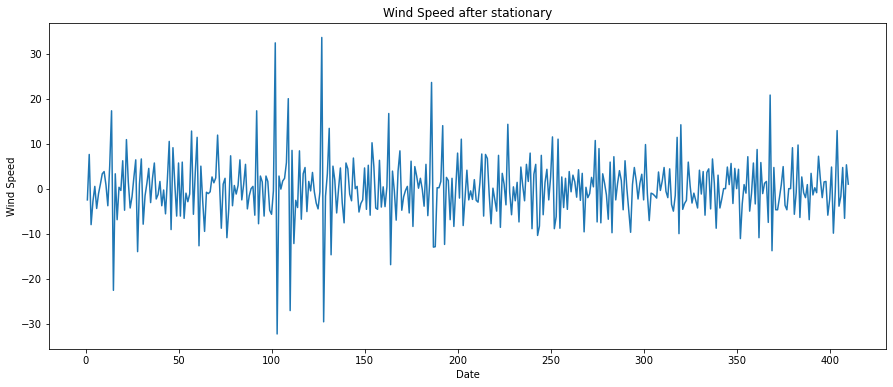

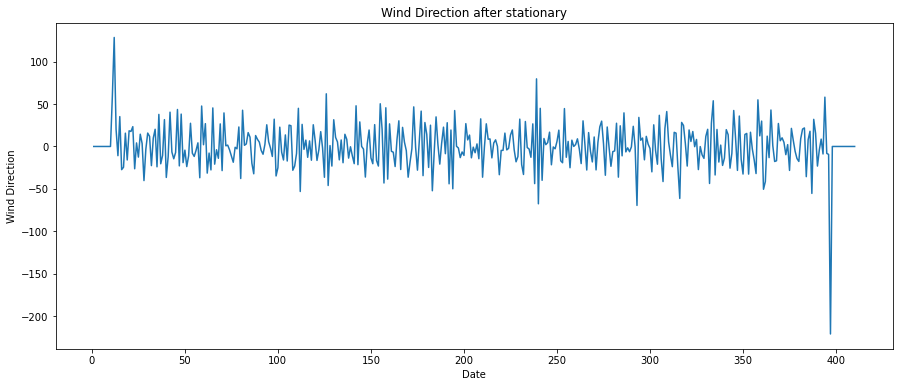

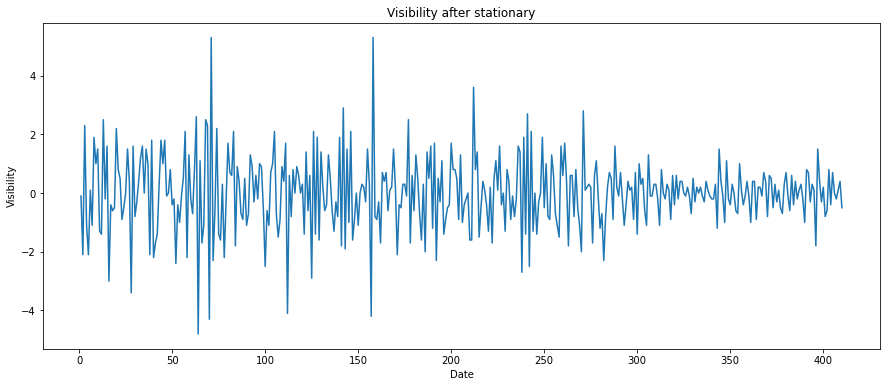

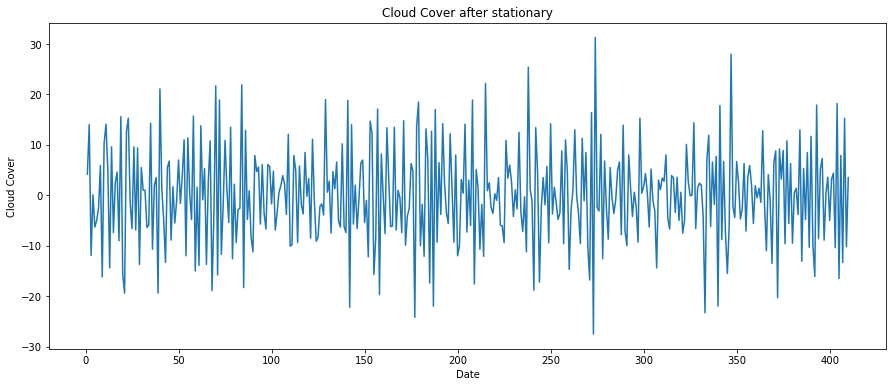

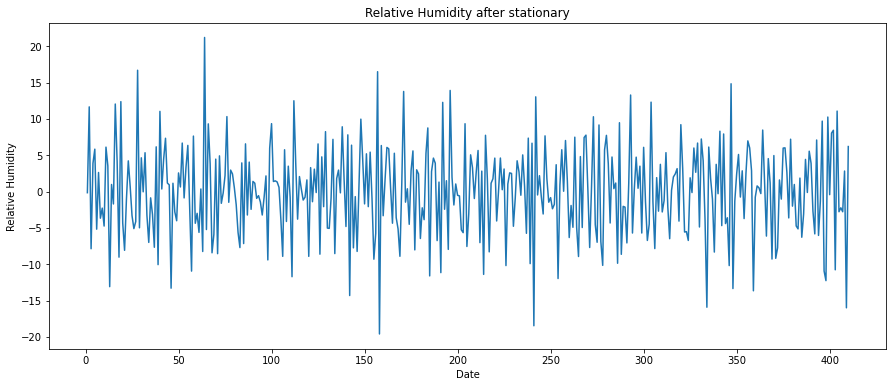

In [320]:
for feature in train_diff:
    train_diff[str(feature)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(feature)
    plt.title(f"{str(feature)} after stationary")
    plt.show()

In [203]:
# x=train_diff[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover','Relative Humidity']]

# train_diff,testX=time_train_test_split(x,test_size=0.3)

# train_diff

In [322]:
train_diff.shape

(410, 13)

In [323]:
cointegration_test(train_diff)

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Solar_Energy_Production >  2283.19   > nan       =>   False
Biomass_Energy_Production >  1907.4    > 311.1288  =>   True
Hydroelectric_Power_Production >  1635.69   > 263.2603  =>   True
Geothermal_Energy_Production >  1390.53   > 219.4051  =>   True
Wind_Energy_Production >  1172.22   > 179.5199  =>   True
Temperature >  974.97    > 143.6691  =>   True
Wind Chill >  794.26    > 111.7797  =>   True
Precipitation >  637.09    > 83.9383   =>   True
Wind Speed >  502.86    > 60.0627   =>   True
Wind Direction >  382.73    > 40.1749   =>   True
Visibility >  263.28    > 24.2761   =>   True
Cloud Cover >  168.1     > 12.3212   =>   True
Relative Humidity >  74.3      > 4.1296    =>   True


In [326]:
param_grid = {'p': [1,2], 'q':[1,2], 'tr': ['n','c']}
pg = list(ParameterGrid(param_grid))
pg

[{'p': 1, 'q': 1, 'tr': 'n'},
 {'p': 1, 'q': 1, 'tr': 'c'},
 {'p': 1, 'q': 2, 'tr': 'n'},
 {'p': 1, 'q': 2, 'tr': 'c'},
 {'p': 2, 'q': 1, 'tr': 'n'},
 {'p': 2, 'q': 1, 'tr': 'c'},
 {'p': 2, 'q': 2, 'tr': 'n'},
 {'p': 2, 'q': 2, 'tr': 'c'}]

In [327]:
from scipy import linalg
df_results_VARMA = pd.DataFrame(columns=['p', 'q', 'tr','RMSE Solar Energy Production','RMSE Biomass Energy Production','RMSE Hydroelectric Power Production','RMSE Geothermal Energy Production','RMSE Wind Energy Production'])

for a,b in enumerate(pg):
    print("iteration")
    p = b.get('p')
    q = b.get('q')
    tr = b.get('tr')
    model = VARMAX(train_diff, order=(p,q), trend=tr,enforce_stationarity=False).fit(disp=0)
    z = model.forecast(y=train_diff[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover','Relative Humidity']].values, steps=len(testX))
    df_pred = pd.DataFrame(z, columns=[ 'Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production' ])
    res = inverse_diff(df[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production' ]],df_pred)
    openrmse = np.sqrt(metrics.mean_squared_error(testX.Solar_Energy_Production, res.Solar_Energy_Production_1st_inv_diff))
    highrmse = np.sqrt(metrics.mean_squared_error(testX.Biomass_Energy_Production, res.Biomass_Energy_Production_1st_inv_diff))
    lowrmse = np.sqrt(metrics.mean_squared_error(testX.Hydroelectric_Power_Production, res.Hydroelectric_Power_Production_1st_inv_diff))
    closermse = np.sqrt(metrics.mean_squared_error(testX.Geothermal_Energy_Production, res.Geothermal_Energy_Production_1st_inv_diff))
    windrmse = np.sqrt(metrics.mean_squared_error(testX.Wind_Energy_Production, res.Wind_Energy_Production_1st_inv_diff))
    df_results_VARMA = df_results_VARMA.append({'p': p, 'q': q, 'tr': tr,'RMSE Solar Energy Production': openrmse,
                                                'RMSE Biomass Energy Production':highrmse,'RMSE Hydroelectric Power Production':lowrmse,
                                                'RMSE Geothermal Energy Production':closermse , 'RMSE Wind Energy Production' : windrmse}, ignore_index=True)

iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


In [ ]:
#  openrmse = np.sqrt(metrics.mean_squared_error(testX.Solar_Energy_Production, res.Solar_Energy_Production_1st_inv_diff))
#     highrmse = np.sqrt(metrics.mean_squared_error(testX.Biomass_Energy_Production, res.Biomass_Energy_Production_1st_inv_diff))
#     lowrmse = np.sqrt(metrics.mean_squared_error(testX.Hydroelectric_Power_Production, res.Hydroelectric_Power_Production_1st_inv_diff))
#     closermse = np.sqrt(metrics.mean_squared_error(testX.Geothermal_Energy_Production, res.Geothermal_Energy_Production_1st_inv_diff))
#     windrmse = np.sqrt(metrics.mean_squared_error(testX.Wind_Energy_Production, res.Wind_Energy_Production_1st_inv_diff))
#     df_results_VARMA = df_results_VARMA.append({'p': p, 'q': q, 'tr': tr,'RMSE Solar Energy Production': openrmse,
#                                                 'RMSE Biomass Energy Production':highrmse,'RMSE Hydroelectric Power Production':lowrmse,
#                                                 'RMSE Geothermal Energy Production':closermse , 'RMSE Wind Energy Production' : windrmse}, ignore_index=True)

In [328]:
df_results_VARMA.sort_values(by=['RMSE Solar Energy Production','RMSE Biomass Energy Production','RMSE Hydroelectric Power Production','RMSE Geothermal Energy Production','RMSE Wind Energy Production']).head()



,p,q,tr,RMSE Solar Energy Production,RMSE Biomass Energy Production,RMSE Hydroelectric Power Production,RMSE Geothermal Energy Production,RMSE Wind Energy Production
6,2,2,n,0.058777,0.064509,0.038439,0.001387,0.222745
4,2,1,n,0.058927,0.065799,0.038256,0.001376,0.222727
0,1,1,n,0.058997,0.066255,0.042741,0.001528,0.222837
2,1,2,n,0.059174,0.062576,0.038802,0.001342,0.223228
7,2,2,c,0.059188,0.086248,0.038483,0.004417,0.227725


In [329]:
best_values_VARMA = df_results_VARMA.sort_values(by=['RMSE Solar Energy Production','RMSE Biomass Energy Production','RMSE Hydroelectric Power Production','RMSE Geothermal Energy Production','RMSE Wind Energy Production']).head(1)
best_values_VARMA

,p,q,tr,RMSE Solar Energy Production,RMSE Biomass Energy Production,RMSE Hydroelectric Power Production,RMSE Geothermal Energy Production,RMSE Wind Energy Production
6,2,2,n,0.058777,0.064509,0.038439,0.001387,0.222745


In [330]:
p_value_VARMA = best_values_VARMA['p'].iloc[0]
q_value_VARMA = best_values_VARMA['q'].iloc[0] 
tr_value_VARMA = best_values_VARMA['tr'].iloc[0]

In [335]:
model = VARMAX(train_diff,order=(p_value_VARMA, q_value_VARMA),trends = tr_value_VARMA,enforce_stationarity=False).fit(disp=0)
result = model.forecast(steps = 500)




In [340]:
res = inverse_diff(final_prod[['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover','Relative Humidity']], result)
print(len(res))
res.head()

500


,Solar_Energy_Production,Biomass_Energy_Production,Hydroelectric_Power_Production,Geothermal_Energy_Production,Wind_Energy_Production,Temperature,Wind Chill,Precipitation,Wind Speed,Wind Direction,...,Geothermal_Energy_Production_1st_inv_diff,Wind_Energy_Production_1st_inv_diff,Temperature_1st_inv_diff,Wind Chill_1st_inv_diff,Precipitation_1st_inv_diff,Wind Speed_1st_inv_diff,Wind Direction_1st_inv_diff,Visibility_1st_inv_diff,Cloud Cover_1st_inv_diff,Relative Humidity_1st_inv_diff
410,0.000304,-0.001245,0.011363,-0.000165,-0.000562,2.528279,15.304238,-0.338677,-4.305259,-16.396790,...,0.017985,0.356285,48.428279,39.104238,-0.008677,25.494741,185.843210,11.045059,72.705158,56.965708
411,0.000308,-0.012472,-0.004189,0.000122,-0.000236,5.137784,2.339770,-1.187983,-1.239330,-3.279072,...,0.018107,0.356049,53.566063,41.444008,-1.196660,24.255411,182.564137,10.357108,68.162247,58.742339
412,0.000282,0.008017,0.000166,0.000103,0.000151,4.103336,-6.115200,0.834499,-0.056483,9.002226,...,0.018210,0.356200,57.669399,35.328808,-0.362161,24.198929,191.566363,10.245893,68.933482,58.045214
413,0.000138,0.002931,-0.009361,0.000197,-0.000072,2.976183,1.420331,0.013392,-0.082679,-5.574921,...,0.018407,0.356128,60.645582,36.749139,-0.348769,24.116250,185.991443,10.161754,69.089167,59.061746
414,0.000019,-0.002101,-0.008245,-0.000072,0.000078,1.570392,4.278340,-0.152374,-0.735943,-2.453926,...,0.018336,0.356207,62.215975,41.027479,-0.501142,23.380307,183.537517,10.118805,68.353778,60.760483


In [342]:
test_test=res[:177]
pred_test=res[178:]
for i in ['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover','Relative Humidity']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(testX[str(i)] , test_test[str(i)+'_1st_inv_diff'])
    

Evaluation metric for Solar_Energy_Production
MSE is : 0.003503255394653851
MAE is : 0.05317736913827834
RMSE is : 0.05918830454282206
MAPE is : 491.0094675191787
R2 is : -1.1419116440810586

Evaluation metric for Biomass_Energy_Production
MSE is : 0.007438753865912485
MAE is : 0.07991790205575112
RMSE is : 0.08624821079832605
MAPE is : 21.553627068978106
R2 is : -2.673857638890558

Evaluation metric for Hydroelectric_Power_Production
MSE is : 0.0014809789035721427
MAE is : 0.030812524958772965
RMSE is : 0.03848348871363071
MAPE is : 14.53151023456704
R2 is : 0.01152889014560221

Evaluation metric for Geothermal_Energy_Production
MSE is : 1.9509729721125592e-05
MAE is : 0.00405787238164265
RMSE is : 0.004416981969753283
MAPE is : 23.80934935571839
R2 is : -23.377835254199866

Evaluation metric for Wind_Energy_Production
MSE is : 0.05185879448850421
MAE is : 0.21594235536191225
RMSE is : 0.2277252609802088
MAPE is : 265.7754589775477
R2 is : -8.021149791594718

Evaluation metric for Tem

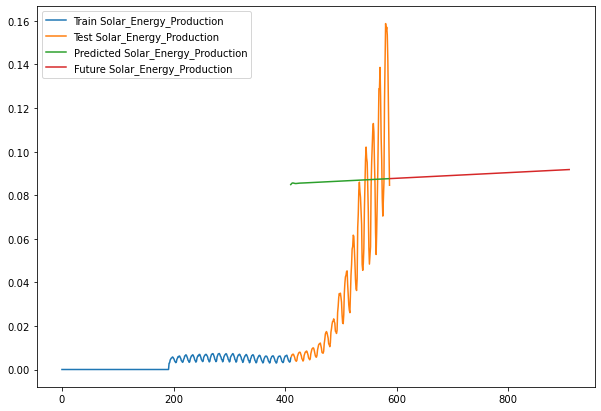

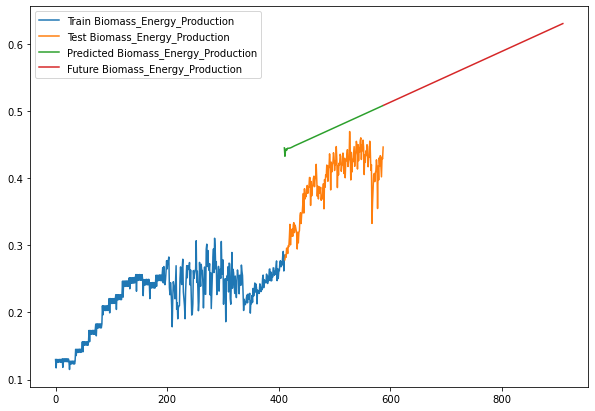

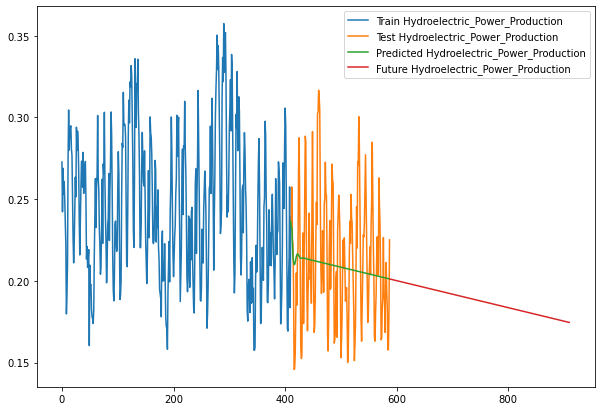

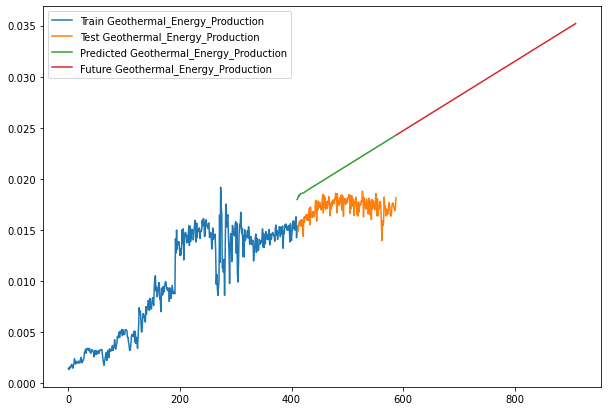

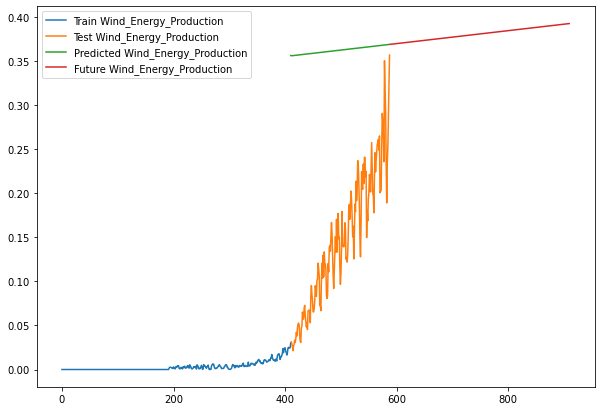

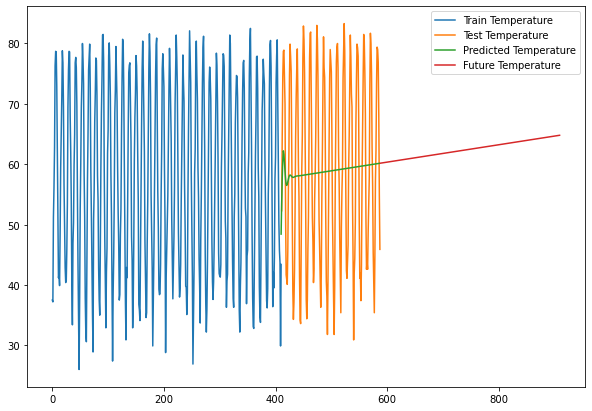

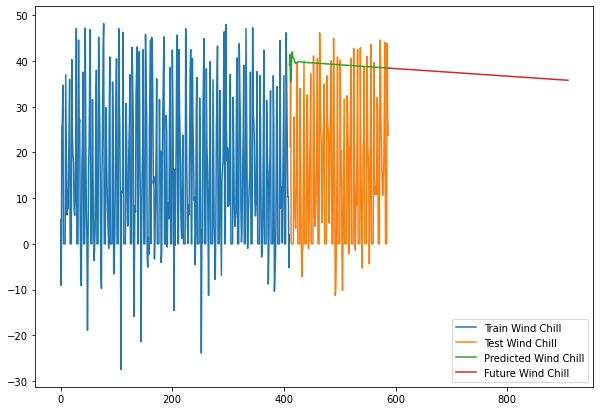

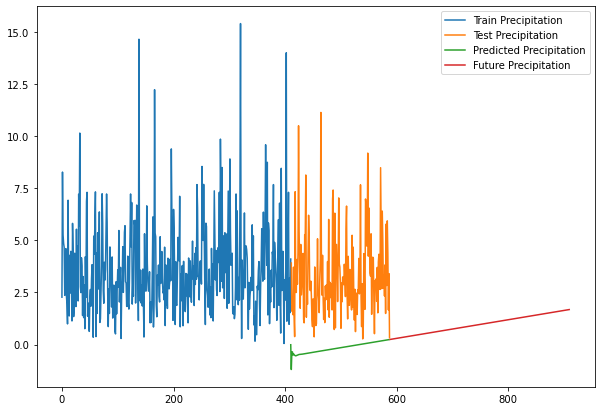

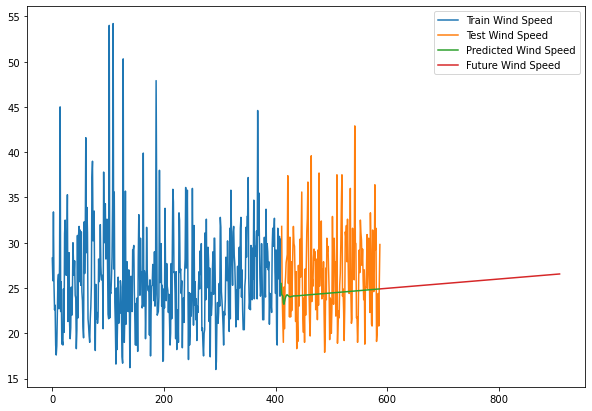

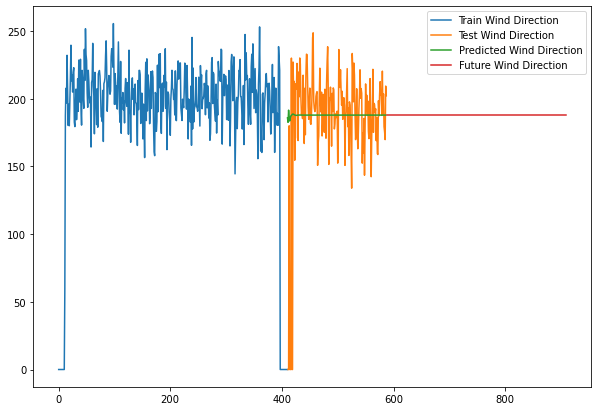

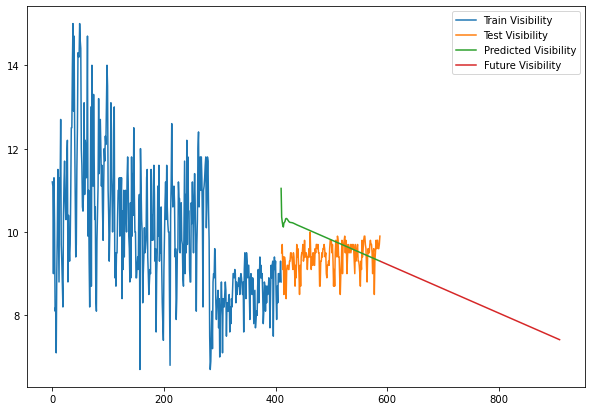

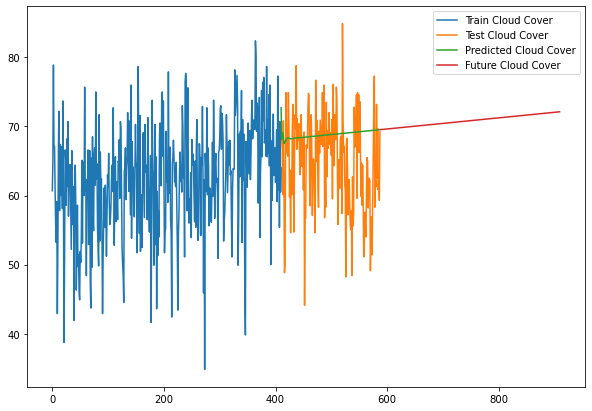

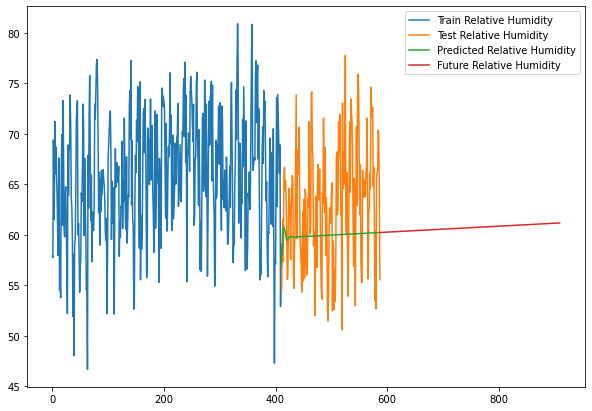

In [343]:
for i in ['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover','Relative Humidity']:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot(trainX[str(i)], label='Train '+str(i))
    plt.plot(testX[str(i)], label='Test '+str(i))
    plt.plot(test_test[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.plot(pred_test[str(i)+'_1st_inv_diff'], label='Future '+str(i))
    plt.legend(loc='best')
    plt.show()

In [345]:
pred_test["Total Renewable Energy Production"]=pred_test['Solar_Energy_Production_1st_inv_diff']+ pred_test['Biomass_Energy_Production_1st_inv_diff']+ pred_test['Hydroelectric_Power_Production_1st_inv_diff']+pred_test['Geothermal_Energy_Production_1st_inv_diff']+pred_test['Wind_Energy_Production_1st_inv_diff']
pred_test.head()

,Solar_Energy_Production,Biomass_Energy_Production,Hydroelectric_Power_Production,Geothermal_Energy_Production,Wind_Energy_Production,Temperature,Wind Chill,Precipitation,Wind Speed,Wind Direction,...,Wind_Energy_Production_1st_inv_diff,Temperature_1st_inv_diff,Wind Chill_1st_inv_diff,Precipitation_1st_inv_diff,Wind Speed_1st_inv_diff,Wind Direction_1st_inv_diff,Visibility_1st_inv_diff,Cloud Cover_1st_inv_diff,Relative Humidity_1st_inv_diff,Total Renewable Energy Production
588,0.000013,0.000379,-0.000083,0.000034,0.000073,0.01439,-0.008293,0.004463,0.005122,-4.098284e-16,...,0.368976,60.177056,38.454441,0.244571,24.905211,187.908787,9.294747,69.540419,60.244305,1.190480
589,0.000013,0.000379,-0.000083,0.000034,0.000073,0.01439,-0.008293,0.004463,0.005122,-2.602085e-16,...,0.369049,60.191447,38.446149,0.249034,24.910333,187.908787,9.288893,69.548468,60.247232,1.190896
590,0.000013,0.000379,-0.000083,0.000034,0.000073,0.01439,-0.008293,0.004463,0.005122,-2.393918e-16,...,0.369123,60.205837,38.437856,0.253498,24.915454,187.908787,9.283040,69.556517,60.250158,1.191313
591,0.000013,0.000379,-0.000083,0.000034,0.000073,0.01439,-0.008293,0.004463,0.005122,-2.476318e-16,...,0.369196,60.220227,38.429563,0.257961,24.920576,187.908787,9.277186,69.564566,60.253085,1.191729
592,0.000013,0.000379,-0.000083,0.000034,0.000073,0.01439,-0.008293,0.004463,0.005122,-1.509209e-16,...,0.369270,60.234617,38.421270,0.262424,24.925698,187.908787,9.271332,69.572615,60.256012,1.192146


In [346]:
pred_test.iloc[:,14:].to_csv(r'forecasted_data_VARMA.csv')

In [361]:
test_test["Total Renewable Energy Production"]=test_test['Solar_Energy_Production_1st_inv_diff']+ test_test['Biomass_Energy_Production_1st_inv_diff']+ test_test['Hydroelectric_Power_Production_1st_inv_diff']+test_test['Geothermal_Energy_Production_1st_inv_diff']+test_test['Wind_Energy_Production_1st_inv_diff']
# trainX['Total Renewable Energy Production']=df[]

test_tot=df.iloc[-177:]["Total Renewable Energy Production"]


In [366]:
# test_test=res[:177]
# pred_test=res[178:]

# for i in ['Solar_Energy_Production', 'Biomass_Energy_Production', 'Hydroelectric_Power_Production', 'Geothermal_Energy_Production','Wind_Energy_Production','Temperature','Wind Chill','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover','Relative Humidity']:
print(f'Evaluation metric for Total Renewable Energy Production using VARMA')
timeseries_evaluation_metrics_func(test_tot , test_test['Total Renewable Energy Production'])
    

Evaluation metric for Total Renewable Energy Production using VARMA
MSE is : 0.13170957106492798
MAE is : 0.33875061051374405
RMSE is : 0.36291813273096174
MAPE is : 46.422434288609935
R2 is : -4.911894508361171




plt.plot(df.iloc[:-177]['Total Renewable Energy Production'], label='Train Total Renewable Energy Production') 
plt.plot(test_tot, label='test Total Renewable Energy Production')
plt.plot(test_test['Total Renewable Energy Production'], label='Predicted Total Renewable Energy Prouction')
plt.plot(pred_test['Total Renewable Energy Production'], label='Future Total Renewable Energy Production')
plt.legend(loc='best')
plt.show()


In [386]:
df

,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric_Power_Production,Geothermal_Energy_Production,Solar_Energy_Production,Wind_Energy_Production,Biomass_Energy_Production,Total Renewable Energy Production,Total Primary Energy Production
Date time,,,,,,,,,,,,,
1973-01-01,1.166486,1.908249,1.649833,0.208064,4.932632,0.068103,0.272703,0.001491,0.000000,0.000000,0.129787,0.403981,5.404715
1973-02-01,1.086072,1.922543,1.525783,0.195184,4.729582,0.064634,0.242199,0.001363,0.000000,0.000000,0.117338,0.360900,5.155115
1973-03-01,1.196571,1.868430,1.667094,0.214807,4.946902,0.072494,0.268810,0.001412,0.000000,0.000000,0.129938,0.400161,5.419556
1973-04-01,1.112230,1.777561,1.616791,0.209690,4.716271,0.064070,0.253185,0.001649,0.000000,0.000000,0.125636,0.380470,5.160812
1973-05-01,1.216978,1.859241,1.665377,0.215398,4.956995,0.062111,0.260770,0.001537,0.000000,0.000000,0.129834,0.392141,5.411246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,1.001096,3.030351,1.977016,0.618649,6.627111,0.725698,0.183832,0.017345,0.153570,0.234966,0.418346,1.008059,8.360867
2021-09-01,0.994565,2.912485,1.852637,0.595679,6.355365,0.673595,0.157619,0.017141,0.141820,0.251575,0.401881,0.970036,7.998996
2021-10-01,0.981484,3.072584,2.033476,0.634791,6.722335,0.594842,0.157905,0.016890,0.120010,0.284597,0.431384,1.010785,8.327963


In [394]:
len(pred_test['Total Renewable Energy Production'].values)

322

In [407]:
df1 =pd.DataFrame({ 'test_data':test_tot.values,'pred_test':test_test['Total Renewable Energy Production'].values,
                   'date':pd.date_range('2007-04-01', periods=len(test_tot.values),freq='M')})
df2 =pd.DataFrame({ 'future_forecast':pred_test['Total Renewable Energy Production'].values,
                   'date':pd.date_range('2022-01-31', periods=len(pred_test['Total Renewable Energy Production'].values),freq='M')})
df2=df2.set_index('date')
df1=df1.set_index('date')
df2

,future_forecast
date,
2022-01-31,1.190480
2022-02-28,1.190896
2022-03-31,1.191313
2022-04-30,1.191729
2022-05-31,1.192146
...,...
2048-06-30,1.322544
2048-07-31,1.322961
2048-08-31,1.323377


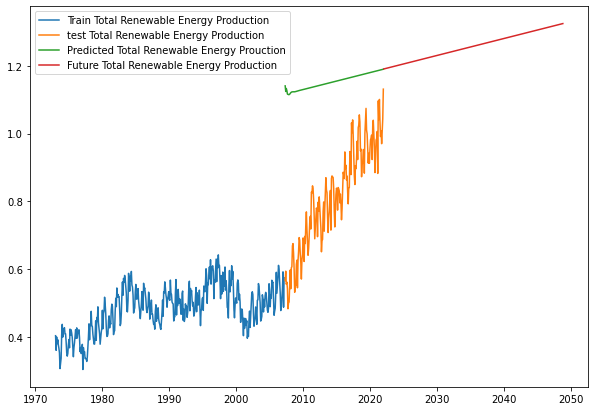

In [408]:

plt.plot(df.iloc[:-177]['Total Renewable Energy Production'], label='Train Total Renewable Energy Production') 
plt.plot(df1['test_data'], label='test Total Renewable Energy Production')
plt.plot(df1['pred_test'], label='Predicted Total Renewable Energy Prouction')
plt.plot(df2['future_forecast'], label='Future Total Renewable Energy Production')
plt.legend(loc='best')
plt.show()
